# 02 - Accessing Processed Data: The Fibers and Images Classes

All data for a single HETDEX observation (a dither set of three exposures), is stored in one HDF5 file. This file contains the processed data in the form of 2D image data and individual fiber data. It also contains branches including information about the astrometric and flux-calibration details. Most users will be most interested in the flux-calibrated fiber information and 2D image data. A user can access all fibers observated at a specific RA/DEC and perform analysis on these retrieved fibers. This data can be retrieved through the Fibers class. The 2D image data represents the intermediary processed data. It provides images for each IFU/amp (essential the original CCD image of the fiber spectra) along each step of calibration. Please refer to Panacea documentation for detailed information on the reduciton process.

We begin by first introducing some global shot functions and then delve into the Fibers and Images classes.

## Opening a shot

If you want to just open the shot HDF5 file and explore contents, you must know the shot ID: either its interger shotid value (20180124010) or the datevobs ('20180124v010'). The last notebook showed how to find a list of shots based on querying the Survey Class. An HDF5 file can be opened using the `get_shot_file()` global command:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval

import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
%run ../shot.py

In [3]:
fileh = open_shot_file('20180124v010')

To see all contents of the shot file, you can do `print(fileh)`:

## Initiate the Fibers Class

To access the fibers of a given shot, you can open the HDF5 shot and load in the RA/DEC of each fiber as an astropy coordinates object in one instance

In [4]:
fibers = Fibers('20180124v010')

The following are functions that act upon the fibers class to aid in querying and retrieving fibers. Use `query_region_idx()` to get the index of all fibers within a defined circular aperture. The center of the aperture must be an astropy coords object, for example:

In [5]:
coords = SkyCoord(150.025513 * u.deg, 2.087767 * u.deg, frame='icrs')

In [6]:
idx = fibers.query_region_idx(coords, radius=3./3600.)
idx

array([ 6947,  6948,  6967,  8384, 16803, 16804, 16823, 26659, 26660,
       26678, 26679, 28096])

We got plot up all spectra using the plot_fiber_spectrum which takes a row index value as an argument and acts upon the Fibers class object.

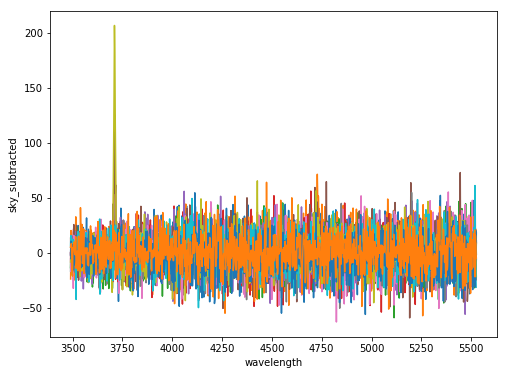

In [7]:
plt.figure(figsize=(8,6))
for i in idx :
    fibers.plot_fiber_spectrum(i)

Using the xlim and ylim options, we can vary the axes range:

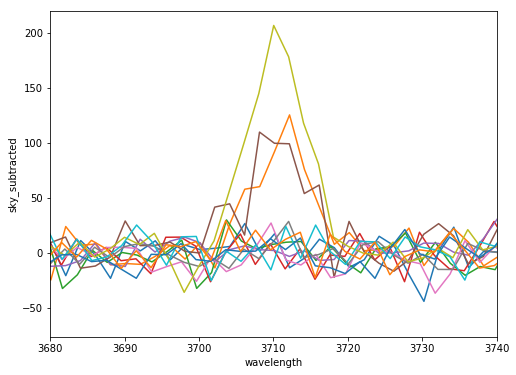

In [8]:
plt.figure(figsize=(8,6))
for i in idx:
    fibers.plot_fiber_spectrum(i, xlim=[3680,3740])

Each fiber can be saved to a text file as follows:

In [9]:
for i in idx:
    fibers.save_fiber_spectrum(i, file='spec_' + str(i) + '.dat')

## Some other Fibers class functions

To find the closet fiber to a set of coordinates:

In [10]:
idx = fibers.get_closest_fiber(coords)

To find the x,y image value in the 2D images arrays, use get_image_xy on the fibers class. A user must provide both a fiber index and a wavelength:

In [11]:
x, y = fibers.get_image_xy(idx, 3710)

## Get Image cutouts:

An image cutout can be extracted for a specific shot either around a set of coorinates or for a specific multiframe ID (this is the IFU/amp ID). For example:

In [12]:
implot = get_image2D_cutout('20180124v010', coords, 3710)

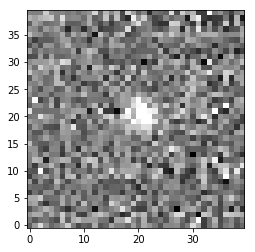

In [13]:
zscale = ZScaleInterval(contrast=0.5,krej=2.5) 
vmin, vmax = zscale.get_limits(values=implot)
plt.imshow(implot,vmin=vmin, vmax=vmax, origin="lower",cmap=plt.get_cmap('gray'),interpolation="none")

Or we can grab an entire amp of interest for a specific shot:

In [14]:
multiframe_obj = 'multi_319_083_023_RL'

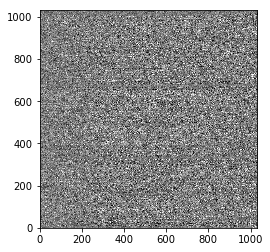

In [15]:
im_amp = get_image2D_amp('20180124v010', multiframe_obj)
zscale = ZScaleInterval(contrast=0.5,krej=2.5) 
vmin, vmax = zscale.get_limits(values=im_amp)
plt.imshow(im_amp,vmin=vmin, vmax=vmax, origin="lower",cmap=plt.get_cmap('gray'),interpolation="none")